### Relevante pakker

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [332]:
df = pd.read_csv("lego.population.csv", sep = ",", encoding = "latin1")

df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [333]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages',  'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

# det er dataset dere skal bruke!
df2

,Set_Name,Theme,Pieces,Price,Pages,Unique_Pieces
2,Creative Blue Bricks,Classic,52.0,4.99,37.0,28.0
3,Creative Green Bricks,Classic,60.0,4.99,37.0,36.0
11,Fire Truck,DUPLO,6.0,6.99,3.0,6.0
12,Tow Truck,DUPLO,7.0,6.99,3.0,7.0
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,52.0
...,...,...,...,...,...,...
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,525.0
1175,Monkie Kid's Team Secret HQ,Monkie Kid,1105.0,169.99,556.0,622.0
1176,Grand Piano,Ideas,3662.0,349.99,564.0,345.0


### Mer eller mindre relevante kodesnutter

In [334]:
print(df2.mean(numeric_only = True))
# vil beregne gjennomsnittet for alle kolonnene i DataFrame df2 som inneholder numeriske verdier. Parametret numeric_only=True sørger for at funksjonen ignorerer ikke-numeriske kolonner (som strenger eller kategoriske variabler).

Pieces           438.041215
Price             47.082733
Pages            107.005423
Unique_Pieces    135.129067
dtype: float64


In [335]:
def stringElementsInArrayToLower(stringArray):
    for i in range(len(stringArray)):
        stringArray[i] = stringArray[i].lower()

gutt = [
    "star wars", "city", "ninjago", "marvel", "technic",
    "Jurassic World", "Hidden side", "Speed champions",
    "Batman", "Monkie Kid", "DC", "Overwatch", "Spider-man"
]
stringElementsInArrayToLower(gutt)
 
# List for 'jente' category
jente = [
    "friends", "disney", "Trolls World Tour", "DOTS", "LEGO Frozen 2",
    "Unikitty", "Powerpuff Girls"
]
stringElementsInArrayToLower(jente)

# List for 'unisex' category
unisex = [
    "DUPLO", "creator 3-in-1", "brickHeadz", "MineCraft",
    "THE LEGO MOVIE 2", "Harry Potter", "Classic",
    "Creator Expert", "Juniors", "Ideas", "Architecture",
    "Powered up", "Xtra", "Minifigures", "Minions",
    "Stranger Things"
]
 
stringElementsInArrayToLower(unisex)

df2["Kjønn"] = pd.NA
 
for index, row in df2.iterrows():
    if row["Theme"].lower() in gutt:
        df2.loc[index, "Kjønn"] = "gutt"
    elif row["Theme"].lower() in jente:
        df2.loc[index, "Kjønn"] = "jente"
    else:
        df2.loc[index, "Kjønn"] = "unisex"
 
for i, r in df2.iterrows():
    print(r["Kjønn"])

df2

unisex
unisex
unisex
unisex
jente
unisex
unisex
jente
jente
jente
gutt
jente
gutt
gutt
jente
unisex
unisex
jente
gutt
gutt
gutt
gutt
gutt
gutt
jente
jente
gutt
gutt
gutt
gutt
gutt
gutt
gutt
jente
unisex
gutt
jente
jente
gutt
jente
unisex
gutt
gutt
gutt
gutt
unisex
unisex
gutt
unisex
gutt
unisex
jente
gutt
unisex
unisex
unisex
unisex
unisex
jente
gutt
gutt
gutt
unisex
unisex
unisex
gutt
gutt
gutt
gutt
unisex
gutt
unisex
gutt
gutt
jente
gutt
jente
jente
unisex
jente
jente
jente
gutt
gutt
unisex
gutt
unisex
gutt
jente
gutt
unisex
jente
jente
jente
unisex
jente
unisex
gutt
gutt
gutt
unisex
jente
gutt
unisex
unisex
gutt
gutt
unisex
unisex
gutt
jente
gutt
unisex
gutt
jente
jente
jente
unisex
gutt
jente
jente
jente
unisex
jente
jente
gutt
gutt
unisex
gutt
unisex
unisex
gutt
unisex
gutt
unisex
unisex
gutt
jente
jente
unisex
jente
jente
jente
unisex
unisex
unisex
jente
unisex
unisex
unisex
jente
unisex
gutt
jente
gutt
gutt
jente
gutt
gutt
gutt
gutt
jente
jente
jente
gutt
gutt
gutt
jente
jente
j

,Set_Name,Theme,Pieces,Price,Pages,Unique_Pieces,Kjønn
2,Creative Blue Bricks,Classic,52.0,4.99,37.0,28.0,unisex
3,Creative Green Bricks,Classic,60.0,4.99,37.0,36.0,unisex
11,Fire Truck,DUPLO,6.0,6.99,3.0,6.0,unisex
12,Tow Truck,DUPLO,7.0,6.99,3.0,7.0,unisex
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,52.0,jente
...,...,...,...,...,...,...,...
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,692.0,unisex
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,525.0,gutt
1175,Monkie Kid's Team Secret HQ,Monkie Kid,1105.0,169.99,556.0,622.0,gutt
1176,Grand Piano,Ideas,3662.0,349.99,564.0,345.0,unisex


In [336]:
#print(df2['Theme'].value_counts())
#print(df2['Theme'].value_counts())
#Finner ut hvor mange tilfeller det er av hver type theme som er representert i datasettet

theme_counts = df2['Theme'].value_counts()
print(theme_counts)

def findSumOfCategory(theme_category):
    sum = 0
    for theme in theme_counts.index:
        if theme in theme_category:
            sum += theme_counts[theme]
    print(sum)

#findSumOfCategory(gutt)
#findSumOfCategory(jente)
#findSumOfCategory(unisex)

df2

Theme
Star Wars            110
Friends              100
City                  94
NINJAGO               78
DUPLO                 51
Marvel                50
Disney                41
Creator 3-in-1        38
Technic               38
BrickHeadz            31
Minecraft             26
THE LEGO MOVIE 2      26
Harry Potter          22
Jurassic World        20
Classic               20
Hidden Side           19
Speed Champions       17
Batman                16
Creator Expert        15
Juniors               12
Ideas                 12
Architecture          11
Trolls World Tour      9
Monkie Kid             9
DC                     9
DOTS                   8
Overwatch              8
LEGO Frozen 2          8
Unikitty               6
Powered UP             4
Xtra                   4
Minifigures            3
Powerpuff Girls        2
Minions                2
Spider-Man             2
Stranger Things        1
Name: count, dtype: int64


,Set_Name,Theme,Pieces,Price,Pages,Unique_Pieces,Kjønn
2,Creative Blue Bricks,Classic,52.0,4.99,37.0,28.0,unisex
3,Creative Green Bricks,Classic,60.0,4.99,37.0,36.0,unisex
11,Fire Truck,DUPLO,6.0,6.99,3.0,6.0,unisex
12,Tow Truck,DUPLO,7.0,6.99,3.0,7.0,unisex
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,52.0,jente
...,...,...,...,...,...,...,...
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,692.0,unisex
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,525.0,gutt
1175,Monkie Kid's Team Secret HQ,Monkie Kid,1105.0,169.99,556.0,622.0,gutt
1176,Grand Piano,Ideas,3662.0,349.99,564.0,345.0,unisex


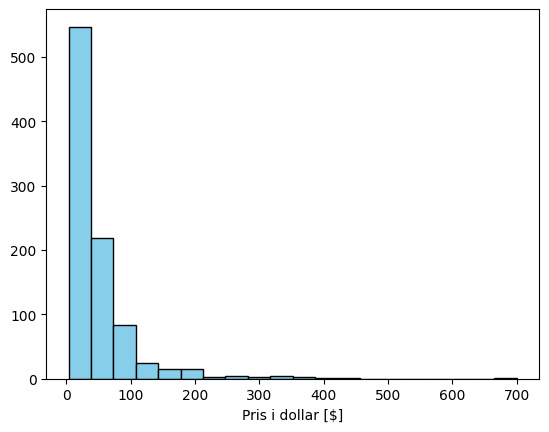

In [337]:
# Lager et histogram for kolonnen 'Price' fra df2
plt.hist(df2['Price'], bins=20, color='skyblue', edgecolor='black')  # Lager et histogram med 20 bins, søylefarge lyseblå og kantfarge svart

# Setter etikett for x-aksen
plt.xlabel('Pris i dollar [$]')  # X-aksen beskriver prisen i dollar

# Setter etikett for y-aksen
plt.ylabel('')  # Y-aksen er tom (ingen beskrivelse)

# Justerer forholdet mellom x- og y-aksen til 1:1
plt.gca().set_aspect(1)  # Setter forholdet mellom aksene til 1:1

# Viser histogrammet
plt.show()  # Viser plottet på skjermen


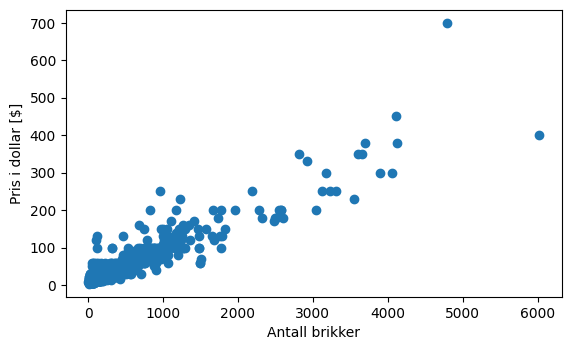

In [338]:
# Lager et spredningsdiagram (scatter plot) mellom antall brikker og pris
plt.scatter(df2['Pieces'], df2['Price'])  # Lager et scatter plot hvor x-aksen representerer 'Pieces' (antall brikker) og y-aksen representerer 'Price' (pris)

# Setter etikett for x-aksen
plt.xlabel('Antall brikker')  # X-aksen viser antall brikker

# Setter etikett for y-aksen
plt.ylabel('Pris i dollar [$]')  # Y-aksen viser prisen i dollar

# Justerer forholdet mellom x- og y-aksen til 5:1
plt.gca().set_aspect(5)  # Setter forholdet mellom aksene slik at y-aksen er 5 ganger kortere enn x-aksen

# Viser plottet
plt.show()  # Viser spredningsdiagrammet på skjermen


In [339]:
# hva er det dyreste settet i datasettet mon tro?
print(df2.loc[df2['Price'].idxmax()])

Set_Name         Imperial Star Destroyer
Theme                          Star Wars
Pieces                            4784.0
Price                             699.99
Pages                              444.0
Unique_Pieces                      445.0
Kjønn                               gutt
Name: 825, dtype: object


In [340]:
# og hvilket har flest brikker?
print(df2.loc[df2['Pieces'].idxmax()])

Set_Name         Hogwarts Castle
Theme               Harry Potter
Pieces                    6020.0
Price                     399.99
Pages                      636.0
Unique_Pieces              624.0
Kjønn                     unisex
Name: 821, dtype: object


In [341]:
# hvilke tema har de billigste settene?
df2.groupby('Theme')['Price'].mean().sort_values(ascending=True)[:3]

Theme
Xtra            3.990000
Minifigures    12.990000
BrickHeadz     13.731935
Name: Price, dtype: float64

In [342]:
# hvilke tema har flest brikker?
df2.groupby('Theme')['Pieces'].mean().sort_values(ascending=False)[:3]

Theme
Stranger Things    2287.0
Powered UP         2113.5
Creator Expert     1958.8
Name: Pieces, dtype: float64

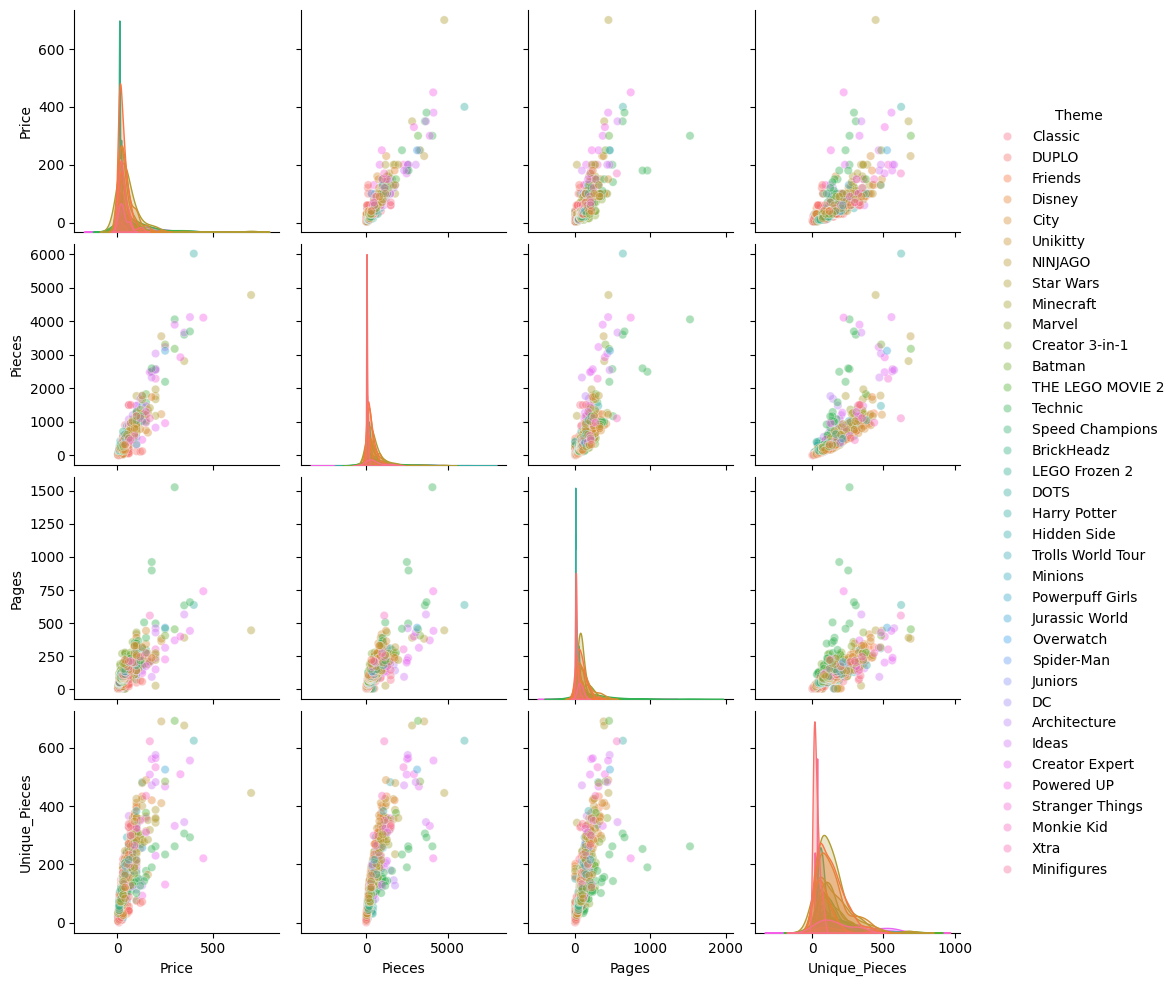

"\n# Lager et parvis plott (pairplot) for de angitte variablene i df2\nsns.pairplot(df2, \n             vars=['Price', 'Pieces', 'Pages', 'Unique_Pieces'],  # Variablene som skal plottes parvis mot hverandre\n             hue='Theme',  # Farger punktene i plottet basert på verdiene i kolonnen 'Theme'\n             diag_kind='kde',  # Bruker en kjernetetthetsestimering (kde) for diagonale plot (univariate fordeling)\n             plot_kws=dict(alpha=0.4))  # Setter alfa-verdien til 0.4 for å gjøre punktene mer gjennomsiktige i scatter plottet\n\n# Viser plottet\nplt.show()  # Viser plottet på skjermen\n\n"

In [343]:
sns.pairplot(df2, vars = ['Price', 'Pieces', 'Pages', 'Unique_Pieces'],
             hue = 'Theme',
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

"""
# Lager et parvis plott (pairplot) for de angitte variablene i df2
sns.pairplot(df2, 
             vars=['Price', 'Pieces', 'Pages', 'Unique_Pieces'],  # Variablene som skal plottes parvis mot hverandre
             hue='Theme',  # Farger punktene i plottet basert på verdiene i kolonnen 'Theme'
             diag_kind='kde',  # Bruker en kjernetetthetsestimering (kde) for diagonale plot (univariate fordeling)
             plot_kws=dict(alpha=0.4))  # Setter alfa-verdien til 0.4 for å gjøre punktene mer gjennomsiktige i scatter plottet

# Viser plottet
plt.show()  # Viser plottet på skjermen

"""

In [344]:
# Enkel lineær regresjon
formel = 'Price ~ Pieces'  # Spesifiserer formelen for lineær regresjon, der 'Price' er avhengig variabel og 'Pieces' er uavhengig variabel

# Lager en OLS (ordinary least squares) lineær regresjonsmodell basert på formelen
modell = smf.ols(formel, data=df2)  # OLS-modellen bygges med formelen 'Price ~ Pieces' og dataen fra DataFrame 'df2'

# Tilpasser modellen til dataene
resultat = modell.fit()  # Tilpasser (fit) modellen til dataene for å finne de beste parameterne

# Viser en detaljert oppsummering av regresjonsresultatene
resultat.summary()  # Skriver ut en statistisk oppsummering av regresjonsmodellen, inkludert koeffisienter, p-verdier, R-kvadrat, og andre statistiske mål


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     5415.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:22:15   Log-Likelihood:                -4161.6
No. Observations:                 922   AIC:                             8327.
Df Residuals:                     920   BIC:                             8337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8962      0.894      9.951      0.000       7.142      10.651
Pieces         0.0872      0.001     73.589      0.000       0.085       0.090
==============================================================================
Omnibus:                      736.003   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45431.936
Skew:                           3.115   Prob(JB):                         0.00
Kurtosis:                      36.820   Cond. No.                         927.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

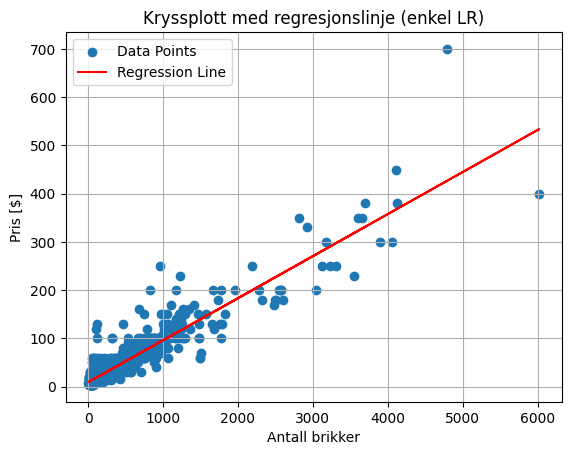

In [345]:
# Henter regresjonskoeffisienten (stigningstall/slope) og interceptet fra resultatet av den lineære regresjonen
slope = resultat.params['Pieces']  # Stigningstallet for antall brikker (Pieces) fra regresjonsmodellen
intercept = resultat.params['Intercept']  # Intercept (skjæringspunktet med y-aksen) fra regresjonsmodellen

# Lager en numpy-array fra kolonnen 'Pieces' for regresjonsprediksjoner
regression_x = np.array(df2['Pieces'])  # Henter verdiene for antall brikker fra df2 og lagrer dem som en numpy-array

# Beregner de estimerte verdiene for pris basert på regresjonsmodellen
regression_y = slope * regression_x + intercept  # Bruker ligningen for en rett linje (y = mx + b) for å beregne pris

# Lager et scatter plot som viser de faktiske datapunktene
plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')  # Plotter de faktiske dataene for antall brikker og pris

# Tegner regresjonslinjen over scatter plottet
plt.plot(regression_x, regression_y, color='red', label='Regression Line')  # Tegner regresjonslinjen i rødt, som viser den estimerte lineære sammenhengen

# Setter etiketten for x-aksen
plt.xlabel('Antall brikker')  # X-aksen representerer antall brikker (Pieces)

# Setter etiketten for y-aksen
plt.ylabel('Pris [$]')  # Y-aksen representerer pris i dollar (Price)

# Setter tittelen på plottet
plt.title('Kryssplott med regresjonslinje (enkel LR)')  # Tittelen beskriver plottet som et kryssplott med en enkel lineær regresjonslinje

# Viser legenden som forklarer de to plottelementene (datapunkter og regresjonslinje)
plt.legend()  # Viser en forklaring for datapunktene og regresjonslinjen i plottet

# Slår på grid (rutenett) i plottet for bedre lesbarhet
plt.grid()  # Legger til et rutenett for å gjøre plottet lettere å lese

# Viser plottet på skjermen
plt.show()  # Viser plottet med datapunktene og regresjonslinjen


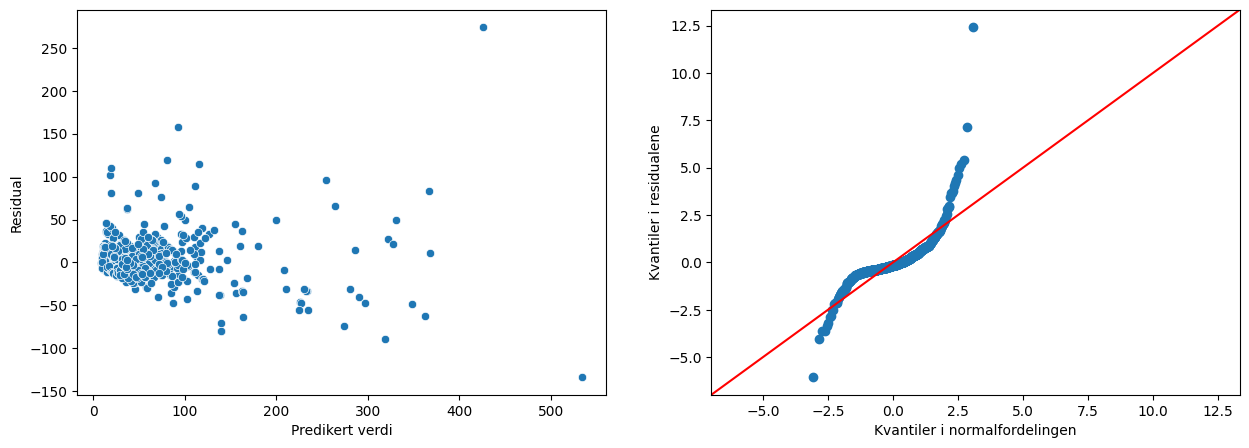

In [346]:
#lager en subplot med 2 grafer, 1 rad 2 kolonner og sjekker om variansen i residualene er uavhengig for kovariatet, svaret er nei fordi det er ikke spredt gjevnt i den første grafen, og den holder seg ikke nærme den røde linja i den andre grafen. 

figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

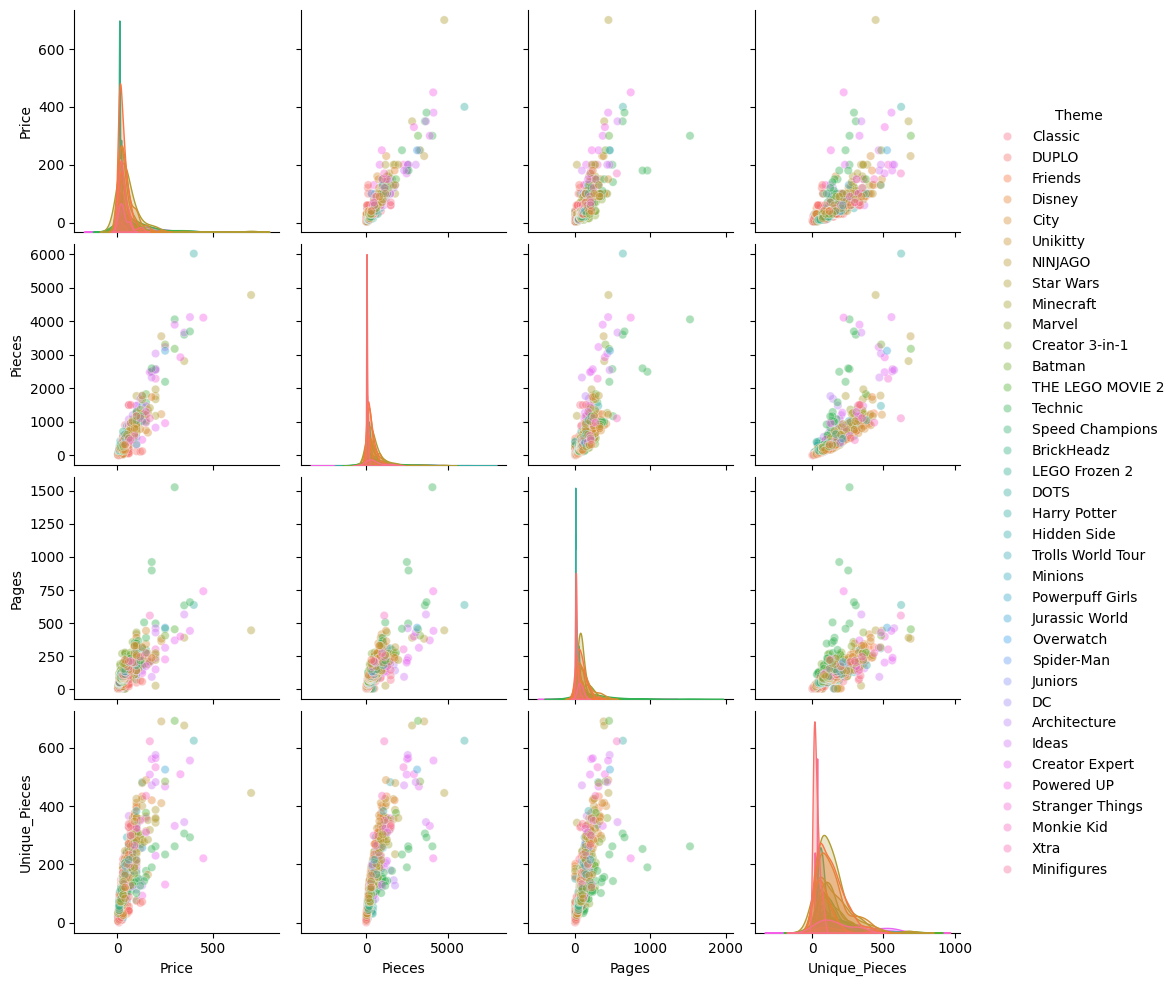

In [347]:
# Velger ut et subset av dataene basert på spesifikke temaer
mythemes = ["gutt", "jente", "unisex"]  # Lager en liste over de temaene vi er interessert i

# Lager et subset av df2 der 'Theme'-kolonnen inneholder kun de valgte temaene
subset_df = df2  # Finner radene i df2 der 'Theme' er enten 'Star Wars', 'NINJAGO', eller 'Harry Potter'

# Lager et parvis plott (pairplot) for de valgte variablene i subset_df
sns.pairplot(subset_df, 
             vars=['Price', 'Pieces', 'Pages', 'Unique_Pieces'],  # Spesifiserer variablene som skal plottes parvis mot hverandre
             hue='Theme',  # Farger punktene basert på verdiene i kolonnen 'Theme'
             diag_kind='kde',  # Bruker en kjernetetthetsestimering (kde) for de diagonale plottene (univariate fordeling)
             plot_kws=dict(alpha=0.4))  # Setter alfa-verdien til 0.4 for å gjøre punktene mer gjennomsiktige i scatter plottet

# Viser plottet
plt.show()  # Viser parvise plottet på skjermen


In [348]:
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()

In [349]:
# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes):
    modell3 = smf.ols('Price ~ Pieces' , data = subset_df[subset_df['Kjønn'].isin([theme])])
    resultater.append(modell3.fit())

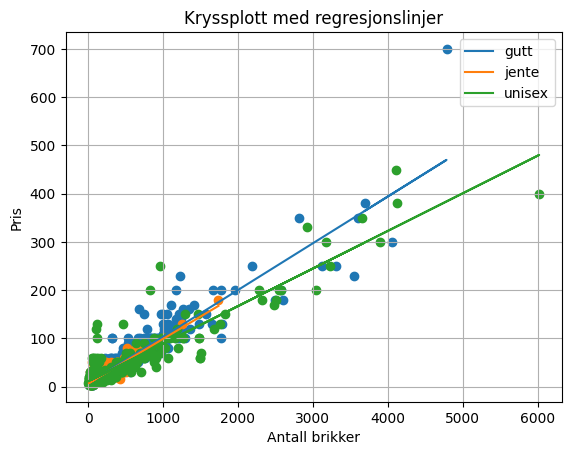

In [350]:
# plott av dataene og regresjonslinjene
for i, theme in enumerate(mythemes):
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df['Kjønn'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Kjønn'].isin([theme])]['Pieces'], subset_df[subset_df['Kjønn'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

## 

In [351]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Price ~ Pieces + Kjønn' , data = subset_df)
modell3_mlr.fit().summary()
 
"""
Basert på resultatene i bildet, ser vi koeffisienter for Theme[T.NINJAGO] og Theme[T.Star Wars],
men ikke for Theme[Harry Potter]. Dette betyr at "Harry Potter" fungerer som referansekategorien i denne modellen.
Koeffisientene for T.NINJAGO og T.Star Wars viser hvor mye gjennomsnittsprisen for disse temaene avviker fra gjennomsnittsprisen for "Harry Potter"-settene, gitt at antall brikker holdes konstant.
 
"""

# multippel lineær regresjon med en annen referansekategori - fordi harry potter var det før
modell3_mlr_alt = smf.ols('Price ~ Pieces + C(Kjønn, Treatment("unisex"))' , data = df2)
modell3_mlr_alt.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1822.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:22:21   Log-Likelihood:                -4157.2
No. Observations:                 922   AIC:                             8322.
Df Residuals:                     918   BIC:                             8342.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  6.1248      1.456      4.206      0.000       3.267       8.983
C(Kjønn, Treatment("unisex"))[T.gutt]      4.8180      1.667      2.889      0.004       1.545       8.091
C(Kjønn, Treatment("unisex"))[T.jente]     1.6753      2.152      0.779      0.436      -2.548       5.898
Pieces                                     0.0872      0.001     73.020      0.000       0.085       0.090
==============================================================================
Omnibus:                      745.244   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45701.758
Skew:                           3.182   Prob(JB):                         0.00
Kurtosis:                      36.899   Cond. No.                     2.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[4.8180379618527835, 7.800085313752927]
0
[ 12.8380319    9.08955647   8.91520878  10.39716418   9.61259955
   9.52542571  12.48933651  10.22281648   9.35107801  10.65868572
  12.31498882  12.57651036  11.26890265  12.14064112  12.14064112
  15.88911655   8.39216569   9.00238262  11.09455496  18.06846273
  17.71976734  18.06846273   9.52542571  12.57651036  10.92020726
  15.01737808  22.0784597   23.90911048  16.15063809  20.50933045
  13.97129191  13.70977037  18.67867966  17.10955041   9.17673032
  11.09455496  12.8380319   18.24281042  22.0784597   10.92020726
  15.45324731  12.92520575  19.37607043  23.29889355  21.29389507
  15.8019427   24.51932741  21.99128585  17.71976734  12.6636842
  12.48933651  11.61759804  19.63759198  22.95019817  13.44824883
  15.27889962  22.25280739  14.3199873   11.87911958  19.46324428
  22.0784597   23.73476279  10.22281648  10.30999033  11.3560765
  24.60650126  20.16063506  30.79584441  11.1817288   12.8380319
  12.31498882  10.83303341  11.879119

IndexError: list index out of range

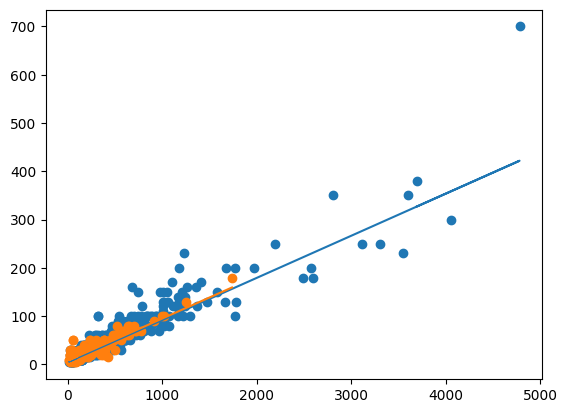

In [366]:
# Henter intercept og slope for hver av temaene 'Star Wars' og 'NINJAGO'
intercept = [modell3_mlr_alt.fit().params['C(Kjønn, Treatment("unisex"))[T.gutt]'], modell3_mlr_alt.fit().params['C(Kjønn, Treatment("unisex"))[T.jente]'] + modell3_mlr_alt.fit().params['Intercept']]
slope = modell3_mlr.fit().params['Pieces']  # Henter koeffisienten for 'Pieces' fra den multiple regresjonsmodellen
# Loop over hvert tema i 'mythemes'
for i, theme in enumerate(mythemes):  # 'mythemes' inneholder de temaene vi er interessert i (f.eks. 'Star Wars', 'NINJAGO', 'Harry Potter')

    # Filtrerer data for det aktuelle temaet og lagrer antall brikker (Pieces)
    regression_x = np.array(subset_df[subset_df['Kjønn'].isin([theme])]['Pieces'])  # Henter verdiene for 'Pieces' for det aktuelle temaet

    # Beregner predikert pris ved hjelp av den lineære regresjonsmodellen for det aktuelle temaet
    regression_y = slope * regression_x + intercept[i]  # Bruker den kalkulerte slope og intercept for å predikere 'Price'

    # Plotter scatter plot og regresjonslinje for hvert tema
    plt.scatter(subset_df[subset_df['Kjønn'].isin([theme])]['Pieces'], subset_df[subset_df['Kjønn'].isin([theme])]['Price'], color=plt.cm.tab10(i))  # Scatter plot for Pieces vs. Price
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)  # Plotter regresjonslinjen for det aktuelle temaet

# Plotter regresjonslinje uten tema som forklaringsvariabel
regression_x = np.array(subset_df['Pieces'])  # Henter 'Pieces' verdiene for hele datasetet
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']  # Beregner predikert 'Price' uten hensyn til 'Theme'
plt.plot(regression_x, regression_y, color='black', label='No theme')  # Plotter regresjonslinjen uten tema

# Legger til akseetiketter og tittel
plt.xlabel('Antall brikker')  # Setter etikett for x-aksen (Antall brikker)
plt.ylabel('Pris [$]')  # Setter etikett for y-aksen (Pris i dollar)
plt.title('Kryssplott med regresjonslinjer')  # Tittelen for plottet

# Viser legenden for å forklare farger og linjer
plt.legend()  # Viser legenden for scatter plottene og regresjonslinjene

# Legger til grid for bedre lesbarhet
plt.grid()  # Viser grid (rutenett) for å gjøre plottet mer lesbart

# Viser plottet
plt.show()  # Viser plottet på skjermen


In [8]:
# med interaksjonsledd mellom antall brikker og tema
modell3_mlri = smf.ols('Price ~ Pieces*Kjønn' , data = df2)
modell3_mlri.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1182.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:04:54   Log-Likelihood:                -4125.3
No. Observations:                 922   AIC:                             8263.
Df Residuals:                     916   BIC:                             8292.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.4549      1.257      5.137      0.000       3.989       8.921
Kjønn[T.jente]             0.0230      2.642      0.009      0.993      -5.163       5.209
Kjønn[T.unisex]            4.4038      1.976      2.228      0.026       0.525       8.282
Pieces                     0.0969      0.002     57.158      0.000       0.094       0.100
Pieces:Kjønn[T.jente]     -0.0045      0.007     -0.651      0.515      -0.018       0.009
Pieces:Kjønn[T.unisex]    -0.0189      0.002     -8.064      0.000      -0.024      -0.014
==============================================================================
Omnibus:                      638.816   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26355.725
Skew:                           2.612   Prob(JB):                         0.00
Kurtosis:                      28.666   Cond. No.                     3.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

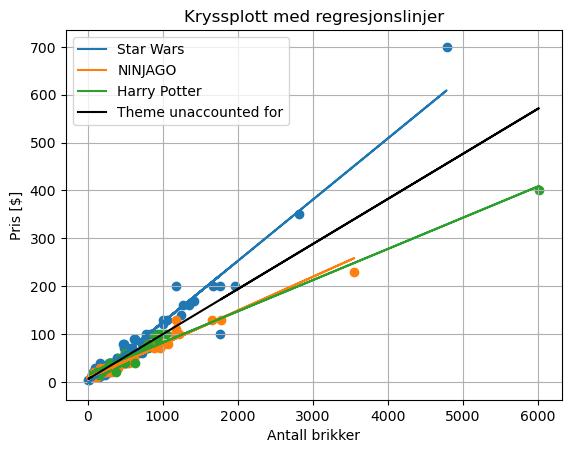

In [59]:
# plott
intercept = [modell3_mlri.fit().params['Theme[T.Star Wars]'], modell3_mlri.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Intercept']
slope = [modell3_mlri.fit().params['Pieces:Theme[T.Star Wars]'], modell3_mlri.fit().params['Pieces:Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label='Theme unaccounted for')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Kode for å lagre plot som (.png)
## fjern 'plt.show()' og erstatt med:
# plt.savefig('my_plot.png')

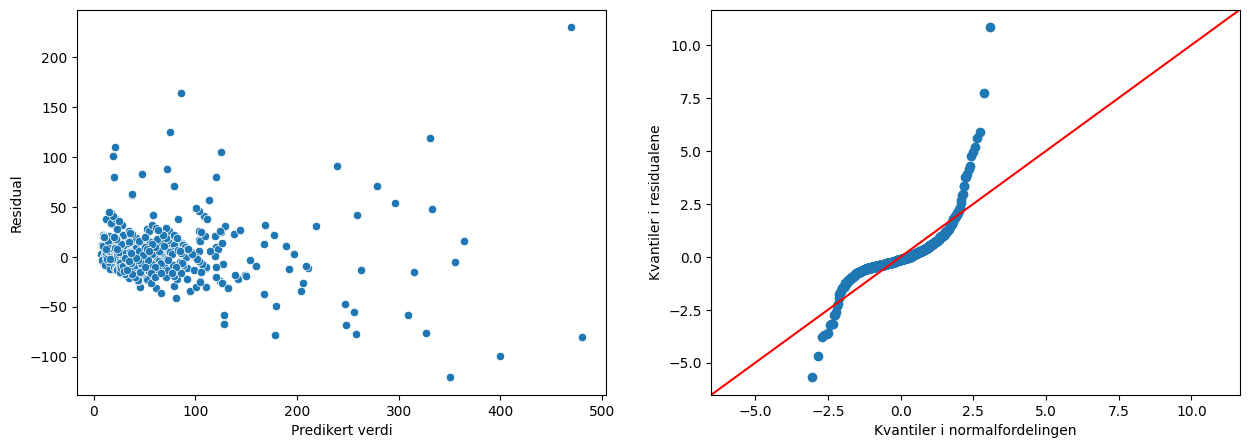

In [11]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [63]:
# Gruppere temaer i nye grupper:
# (Harry Potter, NINJAGO og Star Wars havner i én gruppe, City og Friends i en annen, og alle andre i en tredje)
df2['cat'] = np.where(df2['Theme'].isin(['Harry Potter', 'NINJAGO', 'Star Wars']), 'Cat1', 
                      np.where(df2['Theme'].isin(['City', 'Friends']), 'Cat2', 'Cat3'))
df2.groupby(['cat']).size().reset_index(name = 'Count')

,cat,Count
0,Cat1,210
1,Cat2,194
2,Cat3,518


In [65]:
df2.groupby(['cat', 'Theme']).size().reset_index(name = 'Count')

,cat,Theme,Count
0,Cat1,Harry Potter,22
1,Cat1,NINJAGO,78
2,Cat1,Star Wars,110
3,Cat2,City,94
4,Cat2,Friends,100
5,Cat3,Architecture,11
6,Cat3,Batman,16
7,Cat3,BrickHeadz,31
8,Cat3,Classic,20
9,Cat3,Creator 3-in-1,38
